# Assignment Solution

In [32]:
from warnings import filterwarnings
filterwarnings('ignore')

### step1. Read the Dataset


In [33]:
import pandas as pd
df1 = pd.read_csv("train.csv")
df1

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

### Step2. Checking Missing Values

In [35]:
df1.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

### step3. Separate X and Y features

In [36]:
df1.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [37]:
X = df1.drop(labels=['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Product ID', 'id'], axis=1)
Y = df1[['Machine failure']]

In [38]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,L,300.6,309.6,1596,36.1,140
1,M,302.6,312.1,1759,29.1,200
2,L,299.3,308.5,1805,26.5,25
3,L,301.0,310.9,1524,44.3,197
4,M,298.0,309.0,1641,35.4,34


In [39]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


### Perform cat con Separation

In [40]:
cat = list(X.columns[X.dtypes == 'object'])
con = list(X.columns[X.dtypes != 'object'])

In [41]:
cat

['Type']

In [42]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]']

### Create a Simple SKlearn Pipline for feature selection

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [44]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant',fill_value='unknown')),
                           ('ordinal', OrdinalEncoder())])

pre1 = ColumnTransformer([('num', num_pipe, con),
                          ('cat', cat_pipe, cat)])

In [45]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, -0.49971115,  0.5564169 ,
         1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, -1.32302768,  1.49443273,
         2.        ],
       [-0.30220363, -1.04035788,  2.05187289, -1.62883096, -1.24144677,
         1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , -0.2174312 ,  1.71330309,
         1.        ],
       [ 0.98656671,  0.69228393, -0.52856537,  0.69997864, -0.97567562,
         1.        ],
       [-1.59097397, -1.32913151,  0.26430672, -0.12333789,  1.94780704,
         1.        ]])

In [46]:
cols = pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'cat__Type'], dtype=object)

In [47]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,2.0
...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,1.0


### Calculating mutual Information Scores

In [48]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.005609  , 0.0023723 , 0.01975777, 0.01987901, 0.00682437,
       0.01076725])

In [49]:
mi = pd.Series(mi)
mi.index = cols
mi = mi.sort_values(ascending=False)
mi

num__Torque [Nm]                0.019879
num__Rotational speed [rpm]     0.019758
cat__Type                       0.010767
num__Tool wear [min]            0.006824
num__Air temperature [K]        0.005609
num__Process temperature [K]    0.002372
dtype: float64

<Axes: title={'center': 'Mutual Information Scores'}>

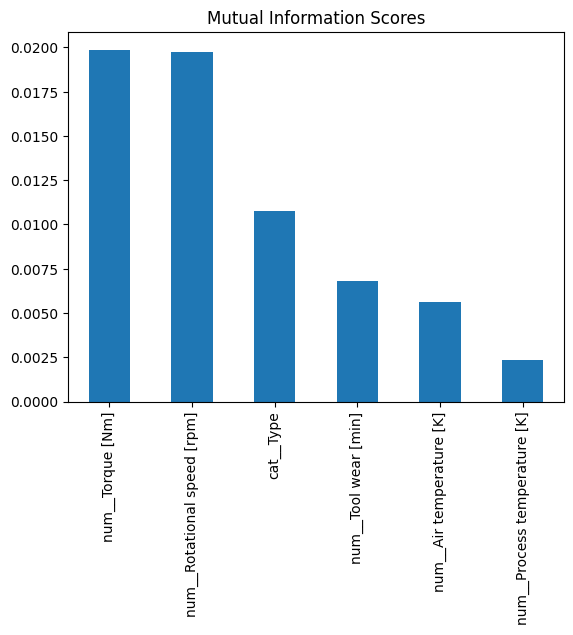

In [50]:
mi.plot(kind = "bar", title='Mutual Information Scores')

In [51]:
sel_cols = list(mi[0:6].index)
sel_cols

['num__Torque [Nm]',
 'num__Rotational speed [rpm]',
 'cat__Type',
 'num__Tool wear [min]',
 'num__Air temperature [K]',
 'num__Process temperature [K]']

In [52]:
#Approach 2 select top n features

from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel = SelectKBest(mutual_info_classif, k=6)
sel_features = sel.fit_transform(X_pre, Y)

In [53]:
sel_cols[0].split('__')[1]

'Torque [Nm]'

In [54]:
imp_cols = []
for i in sel_cols:
    s = i.split('__')[1]
    imp_cols.append(s)

In [55]:
imp_cols

['Torque [Nm]',
 'Rotational speed [rpm]',
 'Type',
 'Tool wear [min]',
 'Air temperature [K]',
 'Process temperature [K]']

In [56]:
X_sel = X[imp_cols]
X_sel

,Torque [Nm],Rotational speed [rpm],Type,Tool wear [min],Air temperature [K],Process temperature [K]
0,36.1,1596,L,140,300.6,309.6
1,29.1,1759,M,200,302.6,312.1
2,26.5,1805,L,25,299.3,308.5
3,44.3,1524,L,197,301.0,310.9
4,35.4,1641,M,34,298.0,309.0
...,...,...,...,...,...,...
136424,37.5,1530,M,210,300.1,311.4
136425,49.1,1447,H,2,297.5,308.5
136426,38.5,1524,L,214,300.5,311.8
136427,46.3,1447,L,42,301.7,310.9


### Cat con For Selected Features

In [57]:
cat_sel = list(X_sel.columns[X_sel.dtypes == 'object'])
con_sel = list(X_sel.columns[X_sel.dtypes != 'object'])

In [58]:
cat_sel

['Type']

In [59]:
con_sel

['Torque [Nm]',
 'Rotational speed [rpm]',
 'Tool wear [min]',
 'Air temperature [K]',
 'Process temperature [K]']

### Create A Final Pipeline

In [60]:
from sklearn.preprocessing import OneHotEncoder

num_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                            ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con_sel),
                          ('cat', cat_pipe2, cat_sel)])

In [62]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre

array([[-0.49971115,  0.54541592,  0.5564169 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.32302768,  1.72030819,  1.49443273, ...,  0.        ,
         0.        ,  1.        ],
       [-1.62883096,  2.05187289, -1.24144677, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.2174312 ,  0.0264451 ,  1.71330309, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.69997864, -0.52856537, -0.97567562, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12333789,  0.26430672,  1.94780704, ...,  0.        ,
         1.        ,  0.        ]])

In [63]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['num__Torque [Nm]', 'num__Rotational speed [rpm]',
       'num__Tool wear [min]', 'num__Air temperature [K]',
       'num__Process temperature [K]', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [64]:
X_sel_pre = pd.DataFrame(X_sel_pre, columns=final_cols)
X_sel_pre

,num__Torque [Nm],num__Rotational speed [rpm],num__Tool wear [min],num__Air temperature [K],num__Process temperature [K],cat__Type_H,cat__Type_L,cat__Type_M
0,-0.499711,0.545416,0.556417,0.395880,-0.246230,0.0,1.0,0.0
1,-1.323028,1.720308,1.494433,1.469856,1.558605,0.0,0.0,1.0
2,-1.628831,2.051873,-1.241447,-0.302204,-1.040358,0.0,1.0,0.0
3,0.464745,0.026445,1.447532,0.610675,0.692284,0.0,1.0,0.0
4,-0.582043,0.869773,-1.100744,-1.000288,-0.679391,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
136424,-0.335048,0.069693,1.650769,0.127386,1.053251,0.0,0.0,1.0
136425,1.029305,-0.528565,-1.601020,-1.268781,-1.040358,1.0,0.0,0.0
136426,-0.217431,0.026445,1.713303,0.342182,1.342025,0.0,1.0,0.0
136427,0.699979,-0.528565,-0.975676,0.986567,0.692284,0.0,1.0,0.0


### Train Test Split

In [65]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=42)

In [66]:
xtrain.shape

(109143, 8)

In [67]:
xtest.shape

(27286, 8)

### Evaluating The Algorithm

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [72]:
dct = {'LogisticRegression': LogisticRegression(),
       'DecisionTree' : DecisionTreeClassifier(),
       'RandomForest' : RandomForestClassifier(),
       'GradientBoostingClassifier' : GradientBoostingClassifier()}

In [73]:
dct.items()

dict_items([('LogisticRegression', LogisticRegression()), ('DecisionTree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('GradientBoostingClassifier', GradientBoostingClassifier())])

In [77]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

tr=[]
tr_cv = []
ts = []

for name, model in dct.items():

    # fit the model on training data
    model.fit(xtrain, ytrain)

    #Predict train and test results
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    #Calculate f1 score
    f1_tr = f1_score(ytrain, ypred_tr)

    #Calculate f1 Cross Validated Results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_tr_cv = scores.mean()

    #Calculating f1 score for testing
    f1_ts = f1_score(ytest, ypred_ts)

    #Append all values in the list
    tr.append(f1_tr)
    tr_cv.append(f1_tr_cv)
    ts.append(f1_ts)

    #printing all results
    print(f'Model Name : {name} \n')
    print(f'F1 training : {f1_tr: .4f}')
    print(f'F1 training CV : {f1_tr_cv: .4f}')
    print(f'F1 testing : {f1_ts: .4f}')

    print('\n==========================================================')

Model Name : LogisticRegression 

F1 training :  0.0721
F1 training CV :  0.0742
F1 testing :  0.0607

Model Name : DecisionTree 

F1 training :  0.9873
F1 training CV :  0.3356
F1 testing :  0.3497

Model Name : RandomForest 

F1 training :  0.9868
F1 training CV :  0.4052
F1 testing :  0.4414

Model Name : GradientBoostingClassifier 

F1 training :  0.4528
F1 training CV :  0.3982
F1 testing :  0.4288



In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=21)
gbc.fit(xtrain, ytrain)

GradientBoostingClassifier(random_state=21)

In [117]:
# Checking the Accuracy for train set

gbc.score(xtrain, ytrain)

0.9877316914506656

In [118]:
# Checking the Accuracy for test set

gbc.score(xtest, ytest)

0.986916367367881

### Create a Data Frame for Model Evaluation

In [79]:
dct_eval ={'Name': list(dct.keys()),
           'TrainF1':tr,
           'TrainF!CV':tr_cv,
           'TestF1':ts}

In [80]:
df1_eval = pd.DataFrame(dct_eval)
df1_eval

,Name,TrainF1,TrainF!CV,TestF1
0,LogisticRegression,0.072102,0.074236,0.060738
1,DecisionTree,0.987342,0.335565,0.349738
2,RandomForest,0.986815,0.405188,0.441358
3,GradientBoostingClassifier,0.452799,0.398153,0.428800


### Selecting Logistic Regression Model

In [81]:
params = {'C' : [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]}


In [82]:
from sklearn.model_selection import RandomizedSearchCV

lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv= 5, scoring='f1', random_state=21)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100,
                                              1000]},
                   random_state=21, scoring='f1')

In [83]:
rscv.best_params_

{'C': 1}

In [84]:
rscv.best_score_

0.07423607332081598

In [85]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=1)

### Evaluate train and test data


In [86]:
best_lr.score(xtrain, ytrain)

0.9846714860320863

In [87]:
best_lr.score(xtest, ytest)

0.9841310562193066

### Predict the train and test data

In [88]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [89]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [90]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [91]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [92]:
ypred_ts[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Creating Confusion Matrix

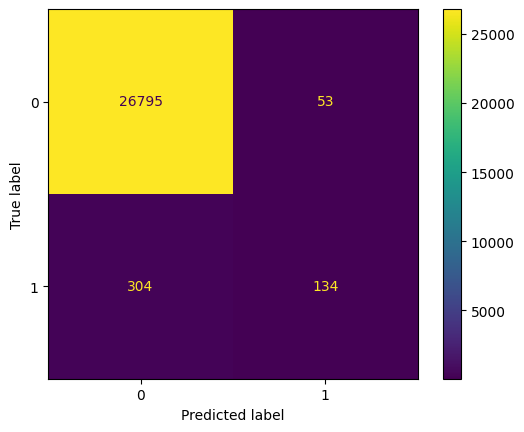

In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

### Print Classification Report on predicted Data 

In [94]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     26848
           1       0.72      0.31      0.43       438

    accuracy                           0.99     27286
   macro avg       0.85      0.65      0.71     27286
weighted avg       0.98      0.99      0.98     27286



### Calculating ROC-AUC Score

In [95]:
yprob_tr = best_lr.predict_proba(xtrain)[:,1]
yprob_ts = best_lr.predict_proba(xtest)[:,1]

In [96]:
yprob_tr[0:5]

array([0.01496491, 0.01658341, 0.01640725, 0.0016955 , 0.0038046 ])

In [97]:
yprob_ts[0:5]

array([0.08144633, 0.00429493, 0.00577187, 0.00291815, 0.01279754])

### Check ROC - AUC Score in Testing

In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain, yprob_tr)

0.8280695167933579

### Plot ROC-AUC Score

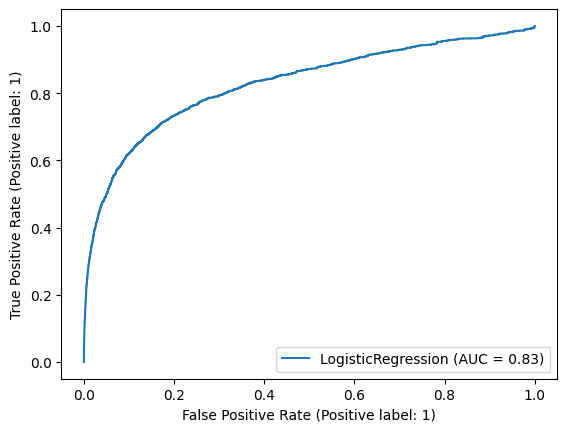

In [99]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr, xtrain, ytrain)

In [122]:
xnew = pd.read_csv("test.csv")
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [123]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [124]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [126]:
xnew_pre = pre2.transform(xnew)
xnew_pre

array([[-0.27623953, -0.15375311, -0.69427087, ...,  0.        ,
         1.        ,  0.        ],
       [-1.35831267,  1.3887435 , -1.36651555, ...,  0.        ,
         1.        ,  0.        ],
       [-0.31152452,  0.03365302, -0.13146138, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.12365707, -0.13933725,  1.29119596, ...,  0.        ,
         1.        ,  0.        ],
       [-0.00572124,  0.09852438, -0.5535685 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.49971115,  0.09852438, -0.19399576, ...,  0.        ,
         1.        ,  0.        ]])

In [127]:
xnew_pre = pd.DataFrame(xnew_pre, columns=final_cols)
xnew_pre

,num__Torque [Nm],num__Rotational speed [rpm],num__Tool wear [min],num__Air temperature [K],num__Process temperature [K],cat__Type_H,cat__Type_L,cat__Type_M
0,-0.276240,-0.153753,-0.694271,1.308759,1.125444,0.0,1.0,0.0
1,-1.358313,1.388744,-1.366516,0.986567,0.764477,0.0,1.0,0.0
2,-0.311525,0.033653,-0.131461,0.771772,0.331317,0.0,1.0,0.0
3,0.852880,-0.297912,-1.554119,0.127386,-0.246230,0.0,0.0,1.0
4,0.111895,-0.038426,0.149943,1.899446,1.702992,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
90949,0.006040,-0.261872,-1.397783,1.308759,1.053251,0.0,1.0,0.0
90950,-0.770229,0.156188,-1.147645,-1.053986,-0.101844,0.0,1.0,0.0
90951,0.123657,-0.139337,1.291196,-2.289058,-2.700806,0.0,1.0,0.0
90952,-0.005721,0.098524,-0.553568,-0.946589,-1.545712,0.0,1.0,0.0


In [136]:
# Predict Values

preds = best_lr.predict(xnew_pre)
probs = best_lr.predict_proba(xnew_pre)[:,1]

In [137]:
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [138]:
probs[0:5]

array([0.0056305 , 0.00169081, 0.00781408, 0.00951009, 0.0157825 ])

In [134]:
df1_results = xnew[['Product ID']]
df1_results

,Product ID
0,L50896
1,L53866
2,L50498
3,M21232
4,M19751
...,...
90949,L51130
90950,L47783
90951,L48097
90952,L48969


In [140]:
df1_results['Machine failure'] = preds
df1_results['Prob'] = probs

In [141]:
df1_results

,Product ID,Machine failure,Prob
0,L50896,0,0.005631
1,L53866,0,0.001691
2,L50498,0,0.007814
3,M21232,0,0.009510
4,M19751,0,0.015782
...,...,...,...
90949,L51130,0,0.005977
90950,L47783,0,0.000355
90951,L48097,0,0.007429
90952,L48969,0,0.005686


<Axes: xlabel='Machine failure'>

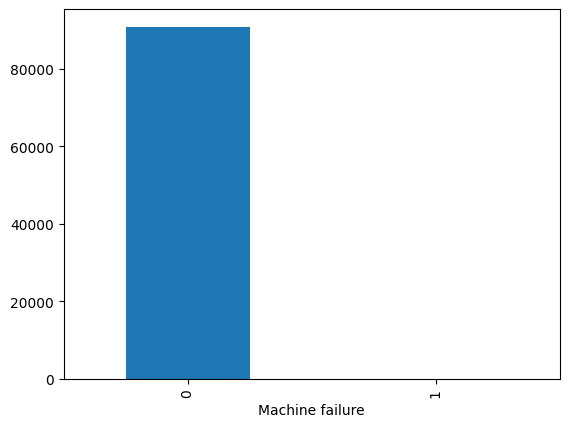

In [142]:
df1_results['Machine failure'].value_counts().plot(kind="bar")

In [143]:
df1_results.to_csv("Results.csv", index=False)